<a href="https://colab.research.google.com/github/Namithakrt/DeepLearning/blob/main/Gen_AI_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow python-dotenv together


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
#Llama Chat Model to answer in a funny way

import os
from dotenv import load_dotenv
from together import Together

# Load environment variables from .env file
load_dotenv()

# Get API key from .env file or prompt user
api_key = os.getenv('API_KEY')
if not api_key:
    api_key = input("Enter your Together API key: ")
    with open('.env', 'w') as f:
        f.write(f'API_KEY={api_key}\n')
    load_dotenv()

# Initialize Together client
client = Together(api_key=api_key)

# Function to print all attributes of an error
def print_error_details(e):
    print(f"Error type: {type(e).__name__}")
    print(f"Error message: {str(e)}")
    for attr in dir(e):
        if not attr.startswith('__') and not callable(getattr(e, attr)):
            try:
                print(f"{attr}: {getattr(e, attr)}")
            except:
                print(f"{attr}: Unable to retrieve")

# Main loop
print("Welcome to the Funny Llama Vision Chat! Ask me anything, and I'll try to give you a humorous response.")
print("Type 'exit' to end the conversation.")

while True:
    try:
        # Get user's question
        user_input = input("\nYou: ")

        if user_input.lower() == 'exit':
            print("Llama: Well, it's been fun! Remember, laughter is the best medicine... unless you're a mime with laryngitis!")
            break

        # Prepare the messages for the API call
        messages = [
            {
                "role": "system",
                "content": "You are a funny AI assistant. Your responses should be funny and entertaining."
            },
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": f"Respond to this in a funny way: {user_input}"
                    }
                ]
            }
        ]

        # Call the API
        response = client.chat.completions.create(
            model="meta-llama/Llama-Vision-Free",
            messages=messages,
            max_tokens=150,
            temperature=0.7,
            top_p=0.9,
            stream=True
        )

        print("Llama:", end=" ", flush=True)
        full_response = ""
        for chunk in response:
            if chunk.choices and chunk.choices[0].delta and chunk.choices[0].delta.content:
                print(chunk.choices[0].delta.content, end="", flush=True)
                full_response += chunk.choices[0].delta.content
        print()  # New line after the response

    except Exception as e:
        print("An error occurred:")
        print_error_details(e)

print("Thank you for chatting with Funny Llama Vision! May your day be filled with more laughs than a hyena at a comedy club!")

Welcome to the Funny Llama Vision Chat! Ask me anything, and I'll try to give you a humorous response.
Type 'exit' to end the conversation.

You: who is mark zuckerberg
Llama: You want to know the real-life superhero behind the curtain of Facebook, Instagram, and WhatsApp? Well, let me tell you, Mark Zuckerberg is like the Elon Musk of social media, but without the cool mustache and the Mars ambitions. He's just a regular guy who created a platform where people can share their thoughts, feelings, and cat pictures with the world.

In reality, Mark Zuckerberg is a genius, billionaire, playboy philanthropist (just like Iron Man, minus the suit and the ego). But don't worry, he's not as evil as he seems in The Social Network (although, let's be real, that movie was pretty accurate).

By day, he's a tech mogul, by night, he's a...

You: exit
Llama: Well, it's been fun! Remember, laughter is the best medicine... unless you're a mime with laryngitis!
Thank you for chatting with Funny Llama Vi

API Key: ****************************************************************
Enter your prompt (type 'exit' to stop): a cute indian boy
Generating image...
Response received.
Base64 data length: 133796
Decoded image data length: 100346
Image size: (1024, 1024), mode: RGB
Image saved as generated_image.png


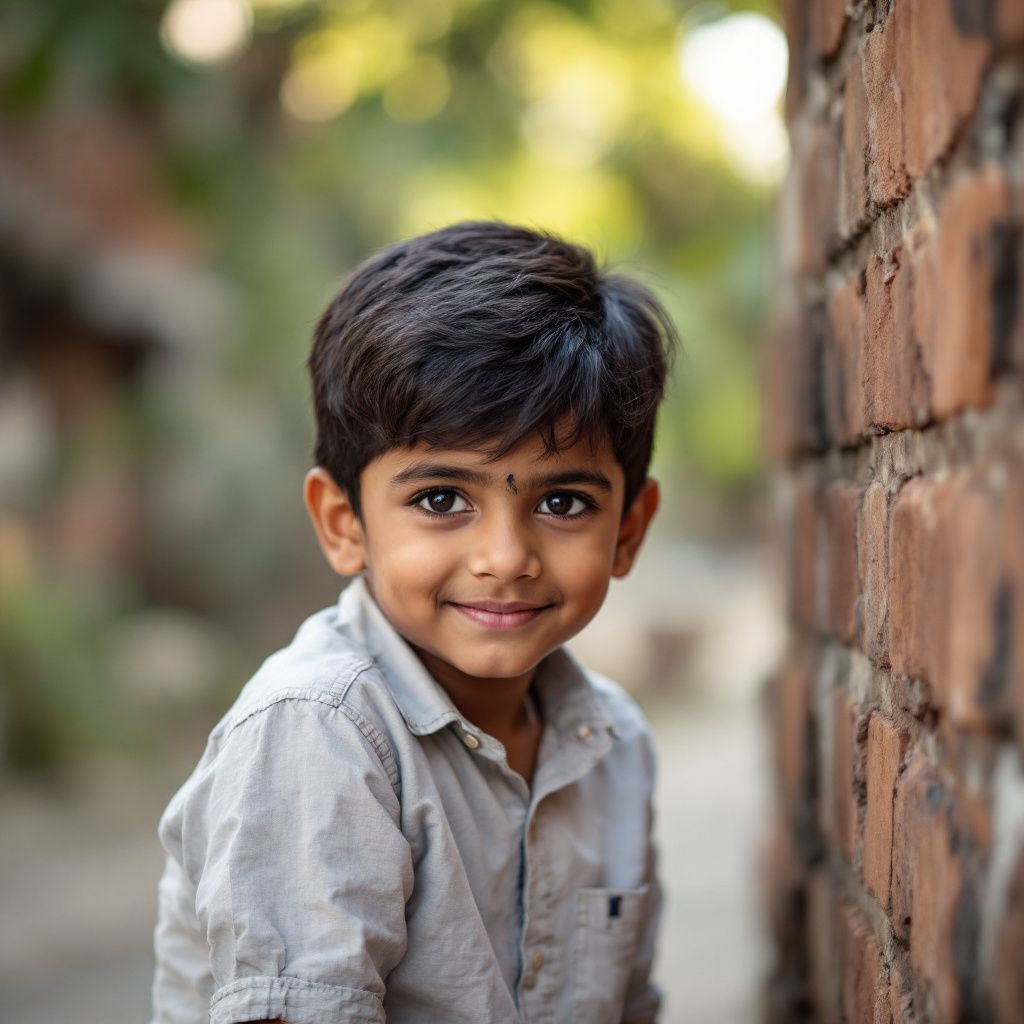

KeyboardInterrupt: Interrupted by user

In [ ]:
#image generation using flux pro 1.1

import os
import base64
from dotenv import load_dotenv
from together import Together
from PIL import Image
from io import BytesIO
from google.colab import files
from IPython.display import display, Image as IPImage

# Load environment variables from .env file
load_dotenv()

# Get the API key from environment variable
api_key = os.getenv('API_KEY')

# If API key is not found in .env, prompt the user
if not api_key:
    api_key = input("Enter your Together API key: ")
    # Save the API key to .env file for future use
    with open('.env', 'w') as f:
        f.write(f'API_KEY={api_key}')

print(f"API Key: {'*' * len(api_key)}")  # Print masked API key for verification

# Initialize Together client
client = Together(api_key=api_key)

# Continue to get prompts from user until 'exit' is typed
while True:
    prompt = input("Enter your prompt (type 'exit' to stop): ")
    if prompt.lower() == 'exit':
        print("Exiting...")
        break

    # Call the image generation API
    try:
        print("Generating image...")
        response = client.images.generate(
            prompt=prompt,
            model="black-forest-labs/FLUX.1.1-pro",
            width=1024,
            height=1024,
            steps=1,
            n=1,
            response_format="b64_json"
        )

        print("Response received.")

        # Extract the base64 string from the response object
        image_data_base64 = response.data[0].b64_json
        print(f"Base64 data length: {len(image_data_base64)}")

        # Decode the base64 string into binary image data
        image_data = base64.b64decode(image_data_base64)
        print(f"Decoded image data length: {len(image_data)}")

        # Create a PIL Image object
        image = Image.open(BytesIO(image_data))
        print(f"Image size: {image.size}, mode: {image.mode}")

        # Save the image to a file
        file_name = "generated_image.png"
        image.save(file_name)
        print(f"Image saved as {file_name}")

        # Display the image in Colab
        display(IPImage(filename=file_name))

        # Option to download the image
        download = input("Do you want to download the image? (yes/no): ")
        if download.lower() == 'yes':
            files.download(file_name)

    except Exception as e:
        print(f"Error: {e}")

print("Script execution completed.")

In [ ]:
import os
import json
from dotenv import load_dotenv
from together import Together
from together.error import InvalidRequestError, APIError
from google.colab import files
from IPython.display import display, Image as IPImage
import base64

load_dotenv()

api_key = os.getenv('API_KEY')
if not api_key:
    api_key = input("Enter your Together API key: ")
    with open('.env', 'w') as f:
        f.write(f'API_KEY={api_key}\n')
    load_dotenv()

client = Together(api_key=api_key)

def upload_and_encode_image():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    with open(file_name, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string, file_name

def print_error_details(e):
    print(f"Error type: {type(e).__name__}")
    print(f"Error message: {str(e)}")
    for attr in dir(e):
        if not attr.startswith('__') and not callable(getattr(e, attr)):
            try:
                print(f"{attr}: {getattr(e, attr)}")
            except:
                print(f"{attr}: Unable to retrieve")

while True:
    try:
        choice = input("Do you want to upload an image (1) or use an existing URL (2)? Enter 1 or 2: ")

        if choice == '1':
            print("Please upload an image:")
            encoded_image, file_name = upload_and_encode_image()
            image_url = f"data:image/jpeg;base64,{encoded_image}"
            display(IPImage(filename=file_name))
        elif choice == '2':
            image_url = input("Enter the URL of the image: ")
        else:
            print("Invalid choice. Please enter 1 or 2.")
            continue

        question = input("What would you like to know about this image? ")

        messages = [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": question},
                    {"type": "image_url", "image_url": {"url": image_url}}
                ]
            }
        ]

        response = client.chat.completions.create(
            model="meta-llama/Llama-Vision-Free",
            messages=messages,
            stream=True
        )

        full_response = ""
        for chunk in response:
            if chunk.choices and chunk.choices[0].delta and chunk.choices[0].delta.content:
                print(chunk.choices[0].delta.content, end='', flush=True)
                full_response += chunk.choices[0].delta.content
        print("\n")

    except InvalidRequestError as e:
        print("Invalid Request Error occurred:")
        print_error_details(e)
    except APIError as e:
        print("API Error occurred:")
        print_error_details(e)
    except Exception as e:
        print("An unexpected error occurred:")
        print_error_details(e)
        import traceback
        traceback.print_exc()

    another = input("Do you want to analyze another image? (yes/no): ")
    if another.lower() != 'yes':
        break

print("Thank you for using the Llama Vision Image Analysis tool!")

Do you want to upload an image (1) or use an existing URL (2)? Enter 1 or 2: 2
Enter the URL of the image: https://cdn.pixabay.com/photo/2024/05/26/10/15/bird-8788491_1280.jpg
What would you like to know about this image? what is the color of the bird
The bird in the image is blue.



KeyboardInterrupt: Interrupted by user